# **Linear Models (Part 1)**

OLS, Ridge and Lasso Regression

Noah Rubin

May 2021

# **Ordinary Least Squares (OLS)**

### <u>Main Ideas</u>

- OLS tries to create a fit that minimises the sum of the squared residuals (sometimes called residual sum of squares, RSS)
- Residuals are the (red) vertical distances from the fit to our data points
- OLS with multiple independent variables is referred to as Multiple Regression
![mr_viz](OLS_image.png)

### <u>Algorithm Details</u>

In the population, the multiple regression model can be given as:

$$y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + ... + \beta_p x_{i,p} + \epsilon_i$$

* $y_i$ represents the $i^{\text{th}}$ observation for our response variable
* $\beta_0$ is the true intercept in the population
* $\beta_1$ is the true coefficient for our first predictor
* $\beta_2$ is the true coefficient for our second predictor
* $\beta_p$ is the true coefficient for our pth predictor
* $x_1, x_2,..., x_p$ are predictor variables
* $\epsilon_i$ represent the unobservables/error term which is assumed to be distributed normally with:

$$E(\epsilon_i) = 0$$
$$Var(\epsilon_i) = \sigma^2 \text{(constant but unknown error variance)}$$ 

It turns out that when deriving OLS with multiple predictor variables, it is easier to see it work as a process of manipulating matrices. Applying the logic from above, it can be seen that

$$y_1 = \beta_0(1) + \beta_1 x_{1,1} + \beta_2 x_{1,2} + ... + \beta_p x_{1,p} + \epsilon_1$$
$$y_2 = \beta_0(1) + \beta_1 x_{2,1} + \beta_2 x_{2,2} + ... + \beta_p x_{2,p} + \epsilon_2$$
$$y_3 = \beta_0(1) + \beta_1 x_{3,1} + \beta_2 x_{3,2} + ... + \beta_p x_{3,p} + \epsilon_3$$
$$\vdots$$
$$y_n = \beta_0(1) + \beta_1 x_{n,1} + \beta_2 x_{n,2} + ... + \beta_p x_{n,p} + \epsilon_n$$


From this it can be seen that we can store our all of our $y_i$ values in an $(n \times 1)$ column vector and our of errors in a vector of the same size, such that:

$$\overrightarrow{y} = \begin{pmatrix}y_1\\y_2\\\vdots\\y_n\end{pmatrix} 
\text{, } 
\overrightarrow{\epsilon} = \begin{pmatrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\end{pmatrix}
$$

Each of the $\beta_j$'s never change across observations so we can store all of our population beta coefficients in a column vector with dimension $((p+1) \times 1)$ as we have $p$ predictor variables as well as an intercept term. Hence, our coefficient vector of betas can be expressed as 

$$
\overrightarrow{\beta} = \begin{pmatrix}\beta_0\\\beta_1\\\beta_2\\\vdots\\\beta_p\end{pmatrix}
$$

Lastly if we look at each row we see that each beta is multiplied by an $x_{i,j}$ term, though $\beta_0$ is just multiplied by 1. So if we take all of our $x_{i, j}$'s out and place them in a [design matrix](http://gradientdescending.com/design-matrix-for-regression-explained/), we simply get all of our $p$ predictor variables as well as a column of ones (which caters for the existence of an intercept term). Hence our design matrix is of dimension $(n \times (p+1))$ and takes the form

$$X = \begin{pmatrix}
1 & x_{1,1} & x_{1,2} & ... & x_{1,p}\\
1 & x_{2,1} & x_{2,2} & ... & x_{2,p}\\
1 & x_{3,1} & x_{3,2} & ... & x_{3,p}\\
\vdots  & \vdots  & \vdots  & \ddots & \vdots\\
1 & x_{n,1} & x_{n,2} & ... & x_{n,p}\\
\end{pmatrix}.$$

If we multiply our design matrix and our vector of coefficients, and then add the vector of error terms, the following equation allows us to find each individual $y_i$ using matrix multiplication and vector addition

$$\begin{pmatrix}y_1\\y_2\\y_3\\\vdots\\y_n\end{pmatrix} = \begin{pmatrix}
1 & x_{1,1} & x_{1,2} & ... & x_{1,p}\\
1 & x_{2,1} & x_{2,2} & ... & x_{2,p}\\
1 & x_{3,1} & x_{3,2} & ... & x_{3,p}\\
\vdots  & \vdots  & \vdots  & \ddots & \vdots\\
1 & x_{n,1} & x_{n,2} & ... & x_{n,p}\\
\end{pmatrix} \begin{pmatrix}{\beta_0}\\\beta_1\\{\beta_2}\\\vdots\\{\beta_p}\end{pmatrix} + \begin{pmatrix}\epsilon_1\\\epsilon_2\\\epsilon_3\\\vdots\\\epsilon_n\end{pmatrix}$$

In short,

$$\vec{y} = X\vec{\beta} + \vec{\epsilon}.$$

































As we wish to minimise the sum of squared deviations between the actual value of $y$ and its expectated value $X\vec{\beta}$ (assuming errors are noramlly distribited with mean zero and unknown but constant variance),
we can minimise the quantity 

$$\sum_{i=1}^n (y_i - (X\vec{\beta})_i)^2 = \vec{\epsilon}^T \vec{\epsilon} = \epsilon_1^2 + \epsilon_2^2 + ... + \epsilon_n^2$$

Also expressable as 

$$J(\vec{\beta}) = (\vec{y} - X\beta)^T(\vec{y} - X\beta)$$ 

Expanding the brackets,

$$J(\vec{\beta}) = \vec{y}^T\vec{y} -2\vec{b}^TX^T \vec{y} + \vec{\beta}^TX^TX\vec{\beta}$$

Now, as we wish to minimise this cost function $J(\vec{\beta})$ we can take the partial derivative with respect to $\vec{\beta}$ and set this to zero. It always ends up being a minimum as $J(\vec{\beta})$ is known to be a [convex function](https://en.wikipedia.org/wiki/Convex_function) with a positive definite Hessian matrix when considering second derivatives

Thus, taking the partial derivative with respect to beta (using matrix calculus) we obtain, 

$$\frac{\partial J(\vec{\beta})}{\partial \vec{\beta}} = -2X{^T}\vec{y} + 2X^TX\vec{\beta}$$ 

Setting this quantity to 0 for a mininum, we can obtain an estimnator $\vec{b}$ for $\vec{\beta}$

$$-2X{^T}\vec{y} + 2X^TX\vec{b} = 0$$

Dividing by two and rearranging,

$$X^TX\vec{b} = X{^T}\vec{y}.$$

"Pre-multiplying" both sides by $(X^TX)^{-1}$ we minimise the sum of squared residuals through 

$$\vec{b} = (X^TX)^{-1}X{^T}\vec{y}$$

...assuming the model is a full rank linear model where $(X^TX)$ is non-singular


#### <ins>Expectation & Variance</ins>

Assuming a full rank linear model, the OLS estimator $\vec{b}$ is unbiased under multiple regression assumptions 1-4, specified in [Introductory Econometrics: A Modern Approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) since:

$$E(\vec{b}) = E((X^TX)^{-1}X^{T}\vec{y}) = (X^TX)^{-1}X^{T}E(\vec{y})$$

Since $E(\vec{y}) = E(X\vec{\beta} + \vec{\epsilon}) = X\vec{\beta}$ it follows that:

$$E(\vec{b}) = (X^TX)^{-1}X^{T}X\vec{\beta} = \vec{\beta}$$

---

Similarly the variance of our $\vec{b}$ estimator is given as:

$$\text{Var}(\vec{b}) = \text{Var}((X^TX)^{-1}X^{T}\vec{y})$$

As $(X^TX)^{-1}X^{T}$ is a $(p+1) \times n$ matrix of real numbers and $\vec{y}$ is an $n \times 1$ column-vector-valued random variable, it follows that

$$\text{Var}(\vec{b}) = (X^TX)^{-1}X^T\text{Var}\vec{(y)}((X^TX)^{-1}X^T)^T$$

Using matrix transpose laws, and the fact that $\text{Var}\vec{(y)} = \text{Var}(X\vec{\beta} + \vec{\epsilon}) = \sigma^2I$ (where $I$ is an $n \times n$ identity matrix)

$$\text{Var}(\vec{b}) = (X^TX)^{-1}X^T\sigma^2IX((X^TX)^T)^{-1}$$

Assuming constant error variance, 

$$\text{Var}(\vec{b}) = \sigma^2I(X^TX)^{-1}X^TX((X^TX)^T)^{-1}$$

Cancelling terms $(X^TX)^{-1}$ and $X^TX$, it follows that 

$$\text{Var}(\vec{b}) = \sigma^2((X^TX)^T)^{-1}$$

Since $X^TX$ is symmetric,

$$\text{Var}(\vec{b}) = \sigma^2(X^TX)^{-1}$$



#### <ins>The Gauss Markov Theorem</ins>

The Gauss Markov Theorem implies that the OLS estimator has the lowest sampling variance out of all linear unbiased estimators if Gauss Markov Assumptions are adhered to. Since we are dealing with unbiased estimators, the fact that OLS has the lowest sampling variance implies it has the lowest mean squared error.

Consider $\vec{b^*}$, an arbitrary linear unbiased estimator of $\beta$ where $\vec{b^*} = ((X^TX)^{-1}X^T + M)\vec{y}$, where $M$ is a $((p+1) \times n)$ non-zero matrtix

Taking the expectation of $\vec{b^*}$, we obtain 

$$E(\vec{b^*}) = E((X^TX)^{-1}X^T + M)\vec{y})$$

Substituting $\vec{y} = X\vec{\beta} + \vec{\epsilon}$

$$E(\vec{b^*}) = E((X^TX)^{-1}X^T + M)(X\vec{\beta} + \vec{\epsilon}))$$

Expanding the brackets, and through linearity of the expectation operator

$$E(\vec{b^*}) = E([(X^TX)^{-1}X^T + M)]X\vec{\beta}) + [(X^TX)^{-1}X^T + M)]E(\vec{\epsilon})$$

Since we assume $E(\epsilon_i) = 0$

$$E(\vec{b^*}) = E([(X^TX)^{-1}X^T + M)]X\vec{\beta})$$

Expanding the brackets, and the fact that $X$ is not considered random,

$$E(\vec{b^*}) = (X^TX)^{-1}X^TX\vec{\beta} + MX\vec{\beta}$$

Due to cancellation in the first term

$$E(\vec{b^*}) = \vec{\beta} + MX\vec{\beta} = (I + MX)\vec{\beta}$$

implying that this estimator can only be unbiased if $MX = 0.$

---

If we consider the variance of this arbitrary estimator


\begin{align} 
\text{Var}(\vec{b^*}) &= \text{Var}((X^TX)^{-1}X^T + M)\vec{y}) \\
&= ((X^TX)^{-1}X^T + M)\text{Var}(\vec{y})((X^TX)^{-1}X^T + M)^T \tag{since $((X^TX)^{-1}X^T + M)$ is not random}\\ 
&= \sigma^2((X^TX)^{-1}X^T + M)((X^TX)^{-1}X^T + M)^T \tag{assuming constant, unknown error variance}\\ 
&= \sigma^2[((X^TX)^{-1}X^T + M)(X(X^TX)^{-1} + M^T)] \tag{applying matrix transpose laws} \\ 
&= \sigma^2[  (X^TX)^{-1}X^TX(X^TX)^{-1} + (X^TX)^{-1}X^TM^T + MX(X^TX)^{-1} + MM^T] \tag{expanding the brackets} \\  
&= \sigma^2(X^TX)^{-1} + \sigma^2(X^TX)^{-1}X^TM^T + \sigma^2MX(X^TX)^{-1} + \sigma^2MM^T \tag{expanding $\sigma^2$ out} \\
&= \text{Var}(\vec{\beta}) + \sigma^2(X^TX)^{-1}(MX)^T + \sigma^2MX(X^TX)^{-1} + \sigma^2MM^T \tag{since $\text{Var}(\vec{\beta}) = \sigma^2(X^TX)^{-1}$}\\
&= \text{Var}(\vec{\beta}) + \sigma^2MM^T \tag{as $MX=0$ for unbiased estimate} \\
&\geq \text{Var}(\vec{\beta}) \tag{since $MM^T$ is positive semi-definite}
\end{align} 

Hence, as $MM^T$ is positive semi-definite, then by the Gauss Markov theorem, $\text{Var}(\vec{b}) \leq \text{Var}(\vec{b^*})$





























# Code 

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
import warnings
warnings.filterwarnings('ignore')

# Personal display settings
#===========================

# Suppress scientific notation
np.set_printoptions(suppress=True)

# Get dataset values showing to 5dp
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_colwidth', None)

# For clear plots with a nice background
plt.style.use('seaborn-whitegrid') 
%matplotlib inline

%load_ext autoreload
%autoreload 2

# python files
import data_prep
import helper_funcs

In [2]:
train = pd.read_csv('../datasets/train_updated.csv')
test = pd.read_csv('../datasets/test_updated.csv')

In [3]:
# Split data
to_drop = ['Country', 'HDI', 'Life_exp']

X_train = train.drop(to_drop, axis='columns')
X_test = test.drop(to_drop, axis='columns')

y_train = train['Life_exp']
y_test = test['Life_exp']

Plan:

* Log the GDP Variable
* Apply one hot encoding to the 'Status' feature
* Perform [KNN imputation](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)
* Once the previous steps have been implemented, run OLS regression on the training data and through cross validation eventually see which value of K was optimal

In [4]:
# This function included in all the steps
ols_pipeline = data_prep.create_pipeline(LinearRegression())
ols_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('logger',
                                                                   FunctionTransformer(func=<ufunc 'log'>))]),
                                                  ['GDP_cap']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Status'])])),
                ('imputation', KNNImputer()), ('model', LinearRegression())])

**Hyperparamter Tuning**

While linear regression does not have any hyperparameters to tune, the KNN imputation beforehand is governed by a value of $k$, which through our pipeline and grid search, we can find what value of $k$, when followed by a linear regression minimised mean squared error

In [5]:
param_grid = {'imputation__n_neighbors':np.arange(3, 16, 2), 'imputation__weights': ['uniform', 'distance']}

best_estimator, best_params = data_prep.exhaustive_search(X_train, 
                                                          y_train, 
                                                          ols_pipeline, 
                                                          param_grid, 
                                                          cv=5, 
                                                          scoring='neg_mean_squared_error')
final_model = best_estimator.fit(X_train, y_train)
print(best_params)

# print(final_model.named_steps['model'].intercept_)
# print(final_model.named_steps['model'].coef_)

{'imputation__n_neighbors': 3, 'imputation__weights': 'distance'}


## **Model Evaluation**
* Statsmodels is useful for model evaluation and hypothesis testing, though it does not support preprocessing and model building pipelines the way sklearn does
* Will therefore perform the previous steps from scratch so that we can evaluate the model in statsmodels 

In [6]:
# Manually applies all the steps specified in the pipeline
X_train_statsmodels, X_test_statsmodels = helper_funcs.apply_preprocessing_steps(X_train, X_test)

In [7]:
# Summary table for our model
model = sm.OLS(y_train, X_train_statsmodels).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life_exp   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3069.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:50:33   Log-Likelihood:                -4754.6
No. Observations:                2056   AIC:                             9527.
Df Residuals:                    2047   BIC:                             9578.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -17.0359     21.452     -0.794      0.427     -59.105      25.033
Year                  0.0404      0.011      3.753      0.000       0.019       0.062
InfantMortality      -0.2106      0.005    -45.826      0.000      -0.220      -0.202
Health_exp            0.2969      0.024     12.134      0.000       0.249       0.345
Employment            0.0274      0.006      4.601      0.000       0.016       0.039
Status               -1.7930      0.210     -8.545      0.000      -2.204      -1.382
MeanSchooling        -0.4358      0.034    -12.825      0.000      -0.502      -0.369
ElectricityAccess     0.0849      0.005     18.368      0.000       0.076       0.094
ln(GDP_cap)           0.8012      0.074     10.805      0.000       0.656       0.947
==============================================================================
Omnibus:                       33.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.062
Skew:                          -0.110   Prob(JB):                     2.47e-13
Kurtosis:                       3.793   Cond. No.                     7.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Heteroskedasticity**

* Homoskedasticity in regression analysis is the idea that the variance of the unobserved factors $\epsilon$ should not change across different segments of the population
* Hence $\text{Var}(\epsilon|x_1, x_2, ... x_p) = \sigma^2$ (constant error variance) must be adhered to to ensure homoskedasticity
* OLS coefficients can still remain unbiased in the presence of heteroskedasticity, and we can still interpret $R^2$ and adjusted $R^2$ to assess goodness-of-fit. Though the problem is that with heteroskedasticity our $F$ statistic (in the above table) is no longer F-distributed and the various $t$ statistics are not t-distributed. Hypothesis testing on our $\hat{\beta}_j$ coefficients can't be done as our p-values will be distorted due to incorrect standard errors in bthe table above
* This means that most of the output in the table above can't be interpreted, and hence we are less sure of the effects of certain variables

<u>Detecting Heteroscedasticity</u>

* To detect heteroskedasticity, we can use tools such as the [Breusch-Pagan Test](https://www.real-statistics.com/multiple-regression/heteroskedasticity/breusch-pagan-test/), or we can simply graph a residual plot. 
* There are also other methods such as using [White's Test](https://www.youtube.com/watch?v=M5xqpKzhyAM), which is similar to the Breusch Pagan test, but considers squared terms and well as cross products of independent variable combinations.

---

**The Breusch-Pagan Test**

We define a null and alternate hypothesis

$$H_0: \text{Var}(\epsilon|x_1, x_2, ... x_p) = \sigma^2 (\text{ homoskedastic errors})$$

$$H_1: \text{Var}(\epsilon|x_1, x_2, ... x_p) \neq \sigma^2 (\text{ heteroskedastic errors})$$

It is also possible to define the null hypothesis as $E(\epsilon^2|x_1, x_2, ... x_p) = \sigma^2$ since  $\text{Var}(\epsilon|x_1, x_2, ... x_p) = E(\epsilon^2|x_1, x_2, ... x_p) - [E(\epsilon|x_1, x_2, ... x_p)]^2$. Due to the zero conditional mean assumption of no correlation between any of the regressors and the error term, this second term disappears, and we can therefore test whether $\epsilon^2$ is related (in expected value) to one or more of the regressors in our model

---

1. Run a regression, with our dependent variable $y$ and all of our predictor $x$ variables
2. As the regression estimate will likely never be a perfect fit for the data, there will be residuals present
3. Store the squared residuals and then let it be the dependent variable for a new regression model, taking the form:

$$\hat{u}^2 = \hat\delta_0 + \hat\delta_1x_1 + \hat\delta_2x_2 + \hat\delta_3x_3 + ... \hat\delta_px_p$$

where $\hat{u}^2$ represents the fitted values for the squared residuals which became our new dependent variable, the $\hat\delta$'s represents the parameters that minimise RSS for this new model, and the $x$ variables represents InfantMortality. MeanSchooling etc.

4. Calculate the $R^2$ coefficient of determination for this model and use this to calculate a test statistic known as the <ins>Lagrange Multiplier</ins>. This is given as:

$$\text{LM}=nR^{2}$$

where $n$ refers to the number of observations in our training set. Under the null hypothesis, this is distributed as a [Chi-squared](https://www.sciencedirect.com/topics/mathematics/chi-square-distribution) random variable with $p$ degrees of freedom, where $p$ is the number of covariates ($x$ variables) in our current model. Depending on the significance level and $p$-values we either reject or fail to reject the null hypothesis.

Performing Breusch Pagan Test...

Lagrange Multiplier = 314.78029411402736, p-value = 2.9336818369803655e-63

Heteroskedasticity is present in this model (at the 5% significance level)


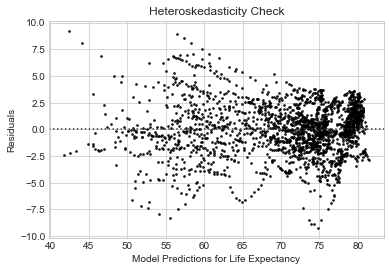

In [8]:
# Heteroskedasticity is present in this model
helper_funcs.test_heteroskedasticity(model)

### **Multicollinearity**

* It is nice to have features strongly correlated with life expectancy, but what if our predictor variables are correlated with each other?
* "In statistics, multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy." ~ Wikipedia

--- 

**Why it can be problematic?**

* Essentially if multicollinearity exists, it becomes very difficult to discern which variable is playing a larger role in our regression model as the two (or more) variables themselves are so similar.
* The idea in regression is that our coefficients represent the change in $y$ when there is a one unit increase in a predictor variable $x$, Ceteris Paribus
* But in cases where multicolinearity exists, often it is not possible to hold other predictor variables constant when one increases 

---

**Mathematically...**

- A model with significant multicolinearity will inflate the standard errors of the beta coefficients impacted by multicollinearity
- As well as standard errors increasing in the prescence of multicollinearity, multicollinearity also makes our coefficients very sensitive to large swings. For example, taking a variable out or adding one in might cause large changes in our current coefficients. Hence we become less certain about what our coefficients might be in the population
- Large standard errors will also distort your p-values as the standard error is used to calculate the t-statistic, which is then used to calculate the p-value. We might then conclude that a variable is insignificant and has no impact on $y$ when in fact it might
- Though even when multicollinearity is present, the least-squares estimator can still be unbiased and efficient.
- Though in cases where there is [perfect multicollinearity](https://www.dummies.com/education/economics/econometrics/perfect-multicollinearity-and-your-econometric-model/), the matrix $X^TX$ becomes singular, which means that OLS will not have a unique solution

---

**Checking for multicollinearity**

1. Using a correlation heatmap
    
* This would involve looking at our correlation heatmap from before and seeing which **predictor** variables have correlation with one another close to -1 and 1.
* This is nice for eyeballing 'red flags' but Variance Inflation Factor is a better option

2. Using [Variance Inflation Factors (VIF)](https://en.wikipedia.org/wiki/Variance_inflation_factor)

The variance of the estimated coefficient for the jth predictor in our regression model is given as:

$$\text{Var}(\hat{\beta}_j) = \frac{\sigma^2}{\sum_{i=1}^{n} {(x_{ij} - \bar{x}_j)^2}} \times \text{VIF}_j$$

Hence VIF is the factor by which $\text{Var}(\hat{\beta}_j)$ increases due there being relationships between the $j^{th}$ predictor and other $x$ variables

* VIF for each predictor variable is calculated using something known as **tolerance**. 

$$\text{tolerance} = 1 - R^2_{\text{When $x_j$ is the response variable}}$$

* The VIF is then computed as:

$$\text{VIF} = \frac{1}{\text{tolerance}}$$

---

When calculating VIF for each predictor variable, we build auxilliary regression models. With an auxiliary regression model, we set one of our $x$ variables to be the response. There is no $y$ here as we are just trying to detect multicollinearity among our regressors

$$\hat{x}_1 = \hat\delta_0 + \hat\delta_1x_2 + \hat\delta_2x_3  + \hat\delta_3x_4 +...+ \hat\delta_px_p$$

In similar fashion to this if we wanted to calculate the VIF for $x_2$ we would build an auxilliary regression of the form

$$\hat{x}_2 = \hat\gamma_0 + \hat\gamma_1x_1 + \hat\gamma_2x_3  + \hat\gamma_3x_4 +...+ \hat\gamma_px_p$$

Now, because we don't want a model where one $x$ variable can be linearly predicted from other $x$ variables, we want $R^2$ to be rather low. A high $R^2$ (i.e. one very close to 1) will mean that **tolerance** gets closer to 0, which would then mean that our VIF becomes very large, such that:

\\[\frac{\text{1}}{\text{a small tolerance number close to 0}} = \text{a very large number} \\]

Typically if our VIF for a particular variable is over 5 (some argue 10), then the prescence of the variable is causing multicolinearity. Statsmodels suggests in its documentation to go for 5 as the max.

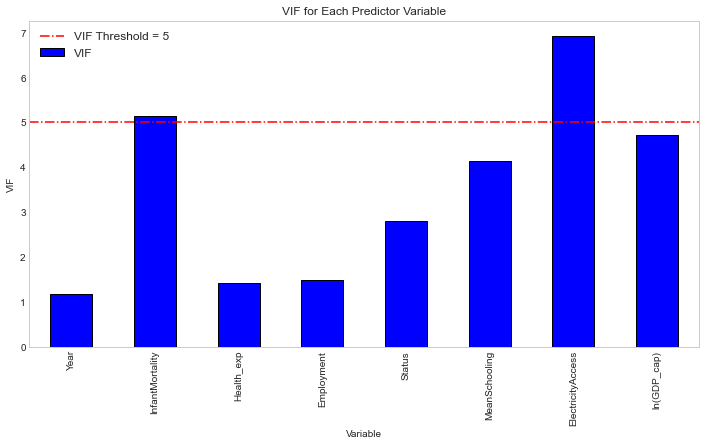

In [9]:
# Potential concerns regarding multicollinearity
helper_funcs.display_vif(X_train_statsmodels, threshold=5);

### <u>Distribution of the Error Term</u>

Ideally, we would like the population error $\epsilon$ to be independent of our regressors and distributed normally (with zero mean and constant error variance). While we don't have the population errors, we can use our sample residuals to make inferences about the population. Though in our case the fact that there was heteroskedasticity implies that there is non-constant error variance present. Nevertheless, it can still be useful to test for normality

Some ways of testing for normality include

- Plot a density curve
- Measure skewness
- QQ-plot
- **Kolmogorov-Smirnov test**
- Jarque-Bera test
- Shapiro-Wilk test
- Anderson-Darling test
- D'Agostino-Pearson test
- Other methods

<u>Kolmogorov-Smirnov Test (KS Test)</u>
* The KS Test is a non-parametric statistical test, so it doesn't assume anything about the distribution of the data
* The KS Test relies on what it known as a [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF). 
* The purpose of the KS Test is to test for differences in the overall shape of two distributions
* The two distributions in our case refer to a the CDF of a standard normal distribution and an Empirical CDF (ECDF)
* An ECDF represents a CDF but for empirical data (observed data), which in turn gives us the probability of observing an $x$ value less than or equal to the one in question
* Though because we are comparing our observed data (the model residuals) against a standard normal distribution, we need to standardise our values as well
* The data needs to be continous in order to do this test.

---

<u>Hypothesis Testing</u>

$$H_0: \text{The two samples have been drawn from the same population distribution}$$
$$H_1: \text{The two samples have NOT been drawn from the same population distribution}$$

In this case, our test statistic 'D' simply refers to the absolute value of the largest vertical distance from our ECDF to the CDF of the standard normal distribution (generic example graphed below). The p-value is then interpreted as the following: 


* If the samples have been drawn from the same population distribution (i.e. if the null hypothesis is true), what is the probability of obtaining a D statistic value at least as extreme as the one that was calculated
* We calculate our p-value based off the Kolmogorov distribution and if our p-value is less than 0.05, there is enough evidence to reject the null hypothesis
---

This graph shows a CDF (red) vs an ECDF (blue), with the D statistic being the maximum vertical distance shown (the black arrow)


![Random Unsplash Image](https://upload.wikimedia.org/wikipedia/commons/c/cf/KS_Example.png)

Kolmogorov Smirnov test results:
-----------------------------------
D-statistic: 0.19236628913486353
p-value: 4.1086043031909534e-67
At the 5% significance level, the data does not follow a normal distribution


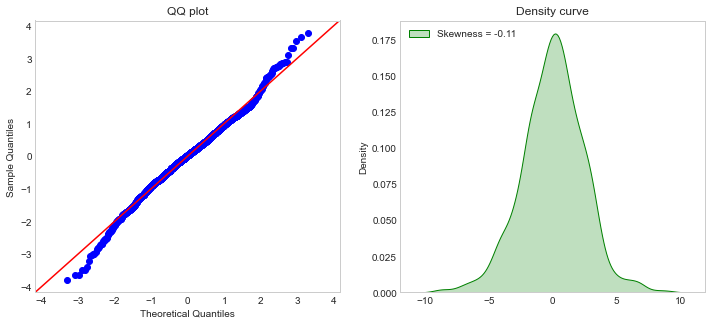

In [10]:
# Call the function
helper_funcs.check_residual_normality(model, residual_data=model.resid);

* While the density curve seems to look normal, the QQ-plot has blue dots that significantly drift from the red line where it is supposed to be. The p-value from the Kolmogorov-Smirnov test also indicates that there is sufficient evidence at the 5% significance level to infer that the alternate hypothesis is true.
* However, requiring the error term to be normally distributed in the population is one of the 'weaker' assumptions of regrerssion models. 
* This is because of the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) which in our regression implies that "regardless of the population distribution of the residuals, the OLS estimators, when properly standardized, have approximate standard normal distributions. This approximation comes about by the central limit theorem because the OLS estimators involve—in a complicated way—the use of sample averages. Effectively, the sequence of distributions of averages of the underlying errors is approaching normality for virtually any population distribution" **- Introductory Econometrics: A Modern. Approach, Fifth Edition. Jeffrey M. Wooldridge.**

---

Ultimately, OLS Regression requires the following assumptions to be met for our coefficient estimates to be [unbiased](https://en.wikipedia.org/wiki/Bias_of_an_estimator).

1. The model is linear in the parameters
2. A random sample has been drawn from the population
3. There is no perfect collinearity (there are no situations where one variable is an exact linear combination of others)
4. The error term is not correlated with any of the regressors, hence $E(\epsilon_i | x_1, x_2, ..., x_p) = 0$ (Zero Conditional Mean)

If all four of these occur, we have unbiased $\hat{\beta}_j$ estimates such that 
$E(\hat{\beta}_j) = \beta_j$, where $E$ denotes the expectation operator. The $\hat{\beta}_j$ coefficients are random variables due to the fact that we can take different samples and with each sample obtain different coefficient estimates, but if our estimates are unbiased, the distribution of each of the $\hat{\beta}_j$ estimators will be centered at the true population parameter $\beta_j$


Moreover, a fifth assumption of homoskedasticity that $\text{Var}(\epsilon|x_1, x_2, ... x_p) = \sigma^2$ implies that the variance of the error term does not depend on our regressors and is constant, though the prescence of heteroskedasticity does not bias the OLS estimator. These first five assumptions collectively refer to the [Gauss Markov assumptions](https://clas.ucdenver.edu/marcelo-perraillon/sites/default/files/attached-files/week_7_diagnostics_0.pdf) of OLS regression and satisfy the results of the Gauss Markov theorem. The sixth assumption that the $\epsilon \sim \mathcal{N}(0, \sigma^2)$ requires normality of the error term and with assumptions 1-5 round out the **classical linear model assumptions** of OLS.

---

The fact that there is heteroskedasticity present in our OLS model means that I can't use this particular model for inference, though it can still be used for predictive purposes. Let's get the adjusted $R^2$ score for the unseen test data


###  Adjusted $R^2$ of the model

* $R^2$ (coefficient of determination) is a goodness-of-fit statistic that measures the proportion of the variance in the dependent variable that is 'explained' by all the covariates in the model
* For instance an $R^2$ of 0.85 implies that there was an 85% reduction in the variance of the dependent variable when the all the independent variables were taken into account

$$ R^2 = 1- \frac{\text{sum of squared residuals around the fit}}{\text{sum of squared residuals around the mean of the dependent variable}}$$

---

* But there is a small problem with this if there is more than one predictor variable in the model
* For example, considering a hypothetical regression model with one predictor variable and 3 observations (rows), a line in two dimensional space might not neccessarily be able to pass through all three points, but adding another variable turns the fitted object becomes a plane, which can always pass through three distinct points no matter where they are
* A plane can always pass through three points, so the coefficient of determination would then be one, regardless of whether the added variable was useful or not.
* Reducing the degrees of freedom in the model in this sense inflates $R^2$, often under false pretences
* Hence it is common to use the adjusted $R^2$ metric that penalises the score if useless variables are added

---

#### The Adjusted $R^2$

Adjusted $R^2$ is given by: \\[\text{Adjusted } R^2 = 1- \frac{{(1-R^2)(n-1)}}{{n-k-1}}  \\]

To account for the fact that simply adding more variables into the model will artificially increase $R^2$, we take the total degrees of freedom into account in order to calculate a more accurate metric known as the adjusted $R^2$. The degrees of freedom is simply given by $n - k - 1$ (the denominator) where $n$ represents the number of observations and $k$ represents the number of regressors.

In [11]:
# Based off this adjusted R^2, it seems that the model does a solid job in predicting y
print(f'Adjusted R^2 for the model = {helper_funcs.adjusted_r2(final_model, X_test, y_test)}')

Adjusted R^2 for the model = 0.9311863193526383


### Save piepline for future use

In [12]:
joblib.dump(final_model, './saved_models/Ordinary Least Squares.joblib')

['./saved_models/Ordinary Least Squares.joblib']

### Make a prediction

- Year 2046
- Infant Mortality of 3.76
- 25% of GDP is spent on health in 2046
- GDP per capita is 87,550
- Employment to population ration (age 15+) is 77.49%
- Developed Country
- Average years of schooling is 11.57
- 100% of the population has access to electricity

In [13]:
saved_pipeline = joblib.load('./saved_models/Ordinary Least Squares.joblib')

input_data = [2046, 3.76, 25, 87550, 77.49, 'Developed', 11.57, 100]
print(f"Predicted Life Expectancy (using OLS) = {helper_funcs.make_prediction(input_data, final_model, X_test)}")

Predicted Life Expectancy (using OLS) = 86.92288085019038


# **Regularised Linear Models**

---

# **Ridge Regression**

#### **Main Ideas**

* [Ridge regression](https://machinelearningmastery.com/ridge-regression-with-python/) extends the concepts of OLS but makes some subtle adjustments through [Tikhonov regularisation](http://anderson.ece.gatech.edu/ece6254/assets/11-regression-regularisation.pdf)
* The idea behind ridge regression is to address the concept of the bias-variance tradeoff in machine learning that suggests that optimising one tends to degrade the other
* Ridge regression purposely introduces bias into the regression model in an effort to reduce the variance, which can then potentially lower the mean squared error of our estimator, since $$\text{MSE} = \text{Bias}^2 + \text{Variance}$$
* Even though by the Gauss-Markov theorem, OLS has the lowest sampling variance out of any linear unbiased estimator, there may be a biased estimator that can achieve a lower mean squared error, such as the ridge estimator
* Ridge regression is also a tool to help reduce the impact of multicollinearity within our feature matrix 

---

#### **Algorithm Details**

The loss function for OLS regression is given as:

$$J(\beta_0, \beta_1, ... , \beta_p) = RSS = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{i,j})^2.$$

This can be expressed in matrix form as:
$$J(\vec{\beta}) = (\vec{y} - X\vec{\beta})^T(y - X\vec{\beta})$$

---

Ridge regression makes a small modification to the OLS loss function, through adding a shrinkage penalty through [L2 regularisation penalty](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261#f810), hence for ridge regression:

$$J(\beta_0, \beta_1, ... , \beta_p) = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{i,j})^2 + \lambda \sum_{j=1}^{p} \beta_j ^2$$

This can be expressed in matrix form as:

$$J(\vec{\beta}) = (\vec{y} - X\vec{\beta})^T(y - X\vec{\beta}) + \lambda\vec{\beta}^{T}\vec{\beta}$$

<b>By convention, columns in $X$ are assumed to have zero mean and unit variance (after scaling), and the response vector $\vec{y}$ is sometimes centered to have mean zero.<b>

---

The lambda parameter $\lambda \in [0, \infty)$ is a constant that can be chosen through resampling methods such as cross validation. Ultimately, if $\lambda = 0$ in the final model, the shrinkage penalty (the second term) disappears and we get OLS coefficient estimates. As $\lambda$ gets larger, the shrinkage penalty becomes increasingly pertinent, and coefficient estimates will tend towards zero (but will not be exactly zero). Since $\lambda$ is a hyperparameter that can be tuned, we get different coefficient estimates depending on which value for $\lambda$ is chosen. Ultimately the shrinkage penalty aims to encourage simpler models that have smaller values for the coefficients as "it turns out that shrinking the coefficient estimates can significantly reduce their variance" - *An Introduction to Statistical Learning: With Applications in R*.
    
Also, the size constraint on the coefficients in the ridge
regression "alleviates the problem of large coefficients (in absolute value) and its high variance, which may be a consequence of multicollinearity." - *Rice University STAT 410 Lecture Slides*

[Resource linked here](https://cpb-us-e1.wpmucdn.com/blogs.rice.edu/dist/e/8375/files/2017/08/Lecture16-1l5v69b.pdf) 

--- 

Expanding the terms in the loss function, we get

$$J(\vec{\beta}) = \vec{y}^T\vec{y} -2\vec{\beta}^TX^T \vec{y} + \beta^TX^TX\vec{\beta} + \lambda\vec{\beta}^{T}\vec{\beta}$$

which is a convex function with a closed form solution when optimising coefficients. Taking the derivative of the loss function with respect to the beta vector we obtain:

$$\frac{\partial J(\vec{\beta})}{\partial \vec{\beta}} = -2X^{T}\vec{y} + 2X^{T}X\vec{\beta} + 2\lambda\vec{\beta}$$

Since $J(\vec{\beta})$ is convex, to minimise this quantity, we can set the derivative equal to 0 to find an estimate $\vec{b}_{ridge}$ for $\vec{\beta}$ thus:

$$-2X^{T}\vec{y} + 2X^{T}X\vec{b} + 2\lambda\vec{b} = 0$$

Moving, $-2X^{T}\vec{y}$ to the other side, and dividing terms by two, we get 

$$X^{T}X\vec{b} + \lambda\vec{b} = X^{T}\vec{y}$$

Factorising out a common factor of $\vec{b}$ we get

$$(X^{T}X + \lambda I)\vec{b} = X^{T}\vec{y}$$

"Pre-multiplying" both sides by $(X^{T}X + \lambda I)^{-1}$ allows us to obtain

$$\vec{b}_{ridge} = (X^{T}X + \lambda I)^{-1}X^{T}\vec{y}$$

Including a positive lambda ensures that we obtain a non singular matrix for $(X^{T}X + \lambda I)^{-1}$, even if $X^TX$ is singular (not of full rank)

This optimisation problem to find $\vec{b}_{ridge}$ could have also been solved using [Lagrange Multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier), where we would find our estimator using the Karush Kuhn-Tucker (KKT) multiplier method.

$$\text{argmin}_{||\vec{\beta}||_2 ^2 \leq c}||\vec{y} - X\vec{\beta}||_2 ^2$$

where we optimise the beta vector subject to the constraint that $\sum_{j=1}^p \beta_{j}^2 \leq c$.



---

**Proving that $\vec{b}_{ridge}$ is biased:**

From above,

$$\vec{b}_{ridge} = (X^{T}X + \lambda I)^{-1}X^{T}\vec{y}$$

Let $M = X^{T}X$, then:

$$\vec{b}_{ridge} = (M + \lambda I)^{-1}M(M^{-1}X^{T}\vec{y})$$

Factorising $M$ out in the first term and substituting the expression for $M$ into the second term, we obtain:

$$\vec{b}_{ridge} = [M(I + \lambda M^{-1})]^{-1}M[(X^TX)^{-1}X^T\vec{y}]$$

Since by matrix inverse laws, $(AB)^{-1} = B^{-1}A^{-1}$, and since $\vec{b}_{ols} = (X^TX)^{-1}X^T\vec{y}$:

$$\vec{b}_{ridge} = (I + \lambda M^{-1})^{-1}M^{-1}M\vec{b}_{ols}$$

Since $A^{-1}A$ is the identity matrix for a matrix $A$, then:

$$\vec{b}_{ridge} = (I + \lambda M^{-1})\vec{b}_{ols}$$

Taking the expectation of this simplified quantity, 

$$E(\vec{b}_{ridge}) = E((I + \lambda M^{-1})\vec{b}_{ols})$$

As $(I + \lambda M^{-1})$ is not random and as the OLS estimator under Gauss Markov assumptions is unbiased, 

$$E(\vec{b}_{ridge}) = (I + \lambda M^{-1})\vec{\beta}_{ols}$$

Which is not equal to $\vec{\beta}_{ols}$ if lambda is non-zero (and positive). But if lambda was zero then it is technically not ridge regression but rather just OLS.

---

**Variance of the ridge estimator**

The variance of the OLS estimator was shown in a previous jupyter notebook to be given as:

$$\text{Var}(\vec{b}_{ols}) = \sigma^2(X^TX)^{-1}$$

The ridge estimator of $\vec{\beta}$ can be given as 
$$\vec{b}_{ridge} = (X^{T}X + \lambda I)^{-1}X^{T}\vec{y}$$

This can also be expressed as,

$$\vec{b}_{ridge} = (X^{T}X + \lambda I)^{-1}X^{T}X(X^{T}X)^{-1}X^T\vec{y}$$

Since $(X^{T}X)^{-1}X^T\vec{y} = \vec{b}_{ols}$,

$$\vec{b}_{ridge} = (X^{T}X + \lambda I)^{-1}X^{T}X\vec{b}_{ols}$$

Taking the variance of both sides:

$$\text{Var}(\vec{b}_{ridge}) = \text{Var}((X^{T}X + \lambda I)^{-1}X^{T}X\vec{b}_{ols})$$

As $\vec{b}_{ols}$ is a random vector, 

$$\text{Var}(\vec{b}_{ridge}) = (X^{T}X + \lambda I)^{-1}X^{T}X\text{Var}(\vec{b}_{ols})((X^{T}X + \lambda I)^{-1}X^{T}X)^T$$

Recognising that $\text{Var}(\vec{b}_{ols}) = \sigma^2(X^TX)^{-1}$ under the homoskedasticity assumption, and by applying the idea that $(AB)^T = B^TA^T$ for matrices $A$ and $B$

$$\text{Var}(\vec{b}_{ridge}) = (X^{T}X + \lambda I)^{-1}X^{T}X\sigma^2 (X^TX)^{-1}X^{T}X(X^{T}X + \lambda I)^{-1}$$

Cancelling terms out and assuming $\sigma^2$ is constant,

$$\text{Var}(\vec{b}_{ridge}) = \sigma^2(X^{T}X + \lambda I)^{-1}X^{T}X(X^{T}X + \lambda I)^{-1}$$
    
The variance of the ridge estimator is always lower than that of OLS. The [proof](https://www.statlect.com/fundamentals-of-statistics/ridge-regression ) is quite long so consider a case where
$X^TX = I$
    
If we substitute $X^TX = I$ into the equation above, we obtain
    
$$\text{Var}(\vec{b}_{ridge}) = \sigma^2(I + \lambda)^{-1}(I + \lambda)^{-1}$$

Factorising out the identity matrix
    
$$\text{Var}(\vec{b}_{ridge}) = \sigma^2(1 + \lambda)^{-1}(1 + \lambda)^{-1}I$$

Simplifying, we get

$$\text{Var}(\vec{b}_{ridge}) = \sigma^2(1 + \lambda)^{-2}I$$
    
Which is certainly lower than the variance of the OLS estimator. Ultimately, different values of lambda will allow us to control both the magnitiude of the variance and the coefficients


---


**Useful property of the ridge estimator**

In cases whether the columns of $X$ are orthonormal (i.e. the columns are orthogonal and each have unit length), then this orthogonal matrix $X$ adheres to:
$$X^TX = X^{-1}X = I.$$ 

More profoundly, if can also be shown that when this condition is met, the ridge estimator is a multiple of the OLS estimator such that,

$$\vec{b}_{ridge} = \frac{1}{1 + \lambda}\vec{b}_{ols}$$
    
If we were now to take the expectation of this quantity, we'd see that ridge estimator, on average, underestimates the true coefficient since 
$$E(\vec{b}_{ridge}) = \frac{1}{1+\lambda}E(\vec{b}_{ols}) = \frac{1}{1+\lambda}\beta$$



Extra resource [here](https://arxiv.org/pdf/1509.09169.pdf)




# **Lasso Regression**


---

* Like ridge, lasso regression aims to address the concept of the bias-variance tradeoff in machine learning that suggests that optimising one tends to degrade the other
* Lasso purposely introduces bias into the regression model in an effort to reduce the variance, which can then potentially lower the mean squared error of our estimator, since $$\text{MSE} = \text{Bias}^2 + \text{Variance}$$
* Even though by the Gauss-Markov theorem, OLS has the lowest sampling variance out of any linear unbiased estimator, there may be a biased estimator that can achieve a lower mean squared error, such as the lasso estimator
* Lasso regression is also a tool to help reduce the impact of multicollinearity within our feature matrix, just like ridge can
* One major advantage that lasso has over ridge is that while ridge can only shrink coefficients towards zero, lasso can shrink coefficients all the way to zero through adding an $L_1$ regaularisation penalty to our ols loss function. The loss function for lasso regression is defined as:

$$J(\beta_0, \beta_1, ... , \beta_p) = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{i,j})^2 + \lambda\sum_{j=1}^p |\beta_j|.$$

In matrix form this is defined as

$$J(\vec{\beta}) = (\vec{y} - X\vec{\beta})^T(y - X\vec{\beta}) + \lambda||\beta||_1$$ 

Because of the mathematical properties that follow from penalising the sum of the absolute values of the $\beta_j$ coefficients, certain coefficients can be shrunk all the way to zero, "...thus the lasso yields models that simultaneously use regularization to improve the model and to conduct feature selection." - Applied Predictive Modeling (By Max Kuhn and Kjell Johnson). In this sense, lasso further encourages parsimonious models through embedded feature selection methods

---

Both ridge and lasso are able to lessen the impact of multicollinearity, but the way that is done is different between the two models. In ridge regression, correlated predictors tend to be close to each other in value, while for lasso, out of the predictors correlated with each other, one tends to stand out while the remaining correlated predictors' coefficient values shrink close toward zero (or exactly zero).

# **Elastic Net Regression**

What if it was possible take advantage of what both Ridge and Lasso Regression offer?

Elastic Net incorporates both the $L_2$ regularisation penalty from Ridge regression but also the $L_1$ penalty from Lasso regression such that the cost function to minimise now becomes:

$$J(\vec{\beta}) = (\vec{y} - X\vec{\beta})^T(y - X\vec{\beta}) + \lambda_1||\beta||_1 + \lambda_2||\beta||^2$$

* Like the loss functionsn of OLS, Ridge and Lasso regression, the loss function for elastic net regression is also convex
* Ultimately, if $\lambda_1 = 0 \text{ and } \lambda_2 \neq 0$ then we get ridge regression. If $\lambda_2 = 0 \text{ and } \lambda_1 \neq 0$ we then get lasso regression. Lastly, if $\lambda_1 = 0 \text{ and } \lambda_2 = 0$ then we just have OLS.
* However, sklearn has a slighly more nuanced loss function that it optimises, inspired by the [glmnet](https://glmnet.stanford.edu/articles/glmnet.html) package in R, that was based off [this academic paper](https://pubmed.ncbi.nlm.nih.gov/20808728/). The loss function glmnet optimises iteratively through an optimisation algorithm known as [coordinate descent](https://en.wikipedia.org/wiki/Coordinate_descent) is given as:

$$J(\vec{\beta}) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}) + \lambda \big[\frac{(1-\alpha)}{2}||\vec{\beta}||^2 + \alpha||\vec{\beta}||_1 \big]$$

Here the elastic net penalty is controlled by the $\alpha$ hyperparameter. In this implementation, if $\lambda > 0$ we get lasso regression if $\alpha = 1$ and ridge if $\alpha = 0$. According to Jerome Friedman, Trevor Hastie and Rob Tibshirani of Stanford university, "the tuning parameter $\lambda$ controls the overall strength of the penalty." If this hyperparameter is zero, we just get OLS.

Note: The $N$ refers to the number of observations. Though Sklearn does not include the $\frac{1}{2N}$ term, which is fine since $N$ is constant

Also, Sklearn refers to $\alpha$ in the above formula is as the "L1 ratio" and refers to the $\lambda$ in the above formula as "alpha", which is confusing.

---

# **Huber Regressor**

Intro:
* The [Huber Regressor](https://towardsdatascience.com/regression-in-the-face-of-messy-outliers-try-huber-regressor-3a54ddc12516) model is designed to try address the problem of outliers that may exist in the dataset and thus falls under a family of models known as robust regression models
* Sometimes it can be used as a good alternative to OLS as OLS tends to pull the fit towards each datapoint, hence outliers can really distort the fit, catalysing inaccurate predictions
* Algorithm was invented by Peter Jost Huber in 1964 though subtle adjustments have been made over time
* As such, the sklearn documentation mentions that its implementation is based off [this academic paper](https://artowen.su.domains/reports/hhu.pdf), published in 2006.

In the sklearn implementation, the Huber loss function applies a transformation to the error depending on it's value, in which we intend to minimise the quantity

$$J = \sum_{i=1}^n \big(\sigma + H_\epsilon\big(\frac{y_i - \hat{y}_i}{\sigma} \big) \big) + \alpha||\vec{\beta}||^2$$

whereby $y_i - \hat{y}_i$. The huber regressor finds an optimal value for $\sigma \in (0, \infty)$ as well as finding the components of the $\vec{\beta}$ vector based on the minimisation of this loss function. The regularisation term $\alpha||\vec{\beta}||^2$ acts as the $L_2$ shrinkage penalty and the function $H$ is piecewise and takes in scalar input $z$ such that

$$H_\epsilon(z) = \begin{cases}
z{^2} & \text{if } |z| < \epsilon,\\
2\epsilon|z| - \epsilon^2  & \text{if } |z| \geq \epsilon\\
\end{cases}$$

---

According to Scikit-Learn documentation, this minimisation process "makes sure that the loss function is not heavily influenced by the outliers while not completely ignoring their effect." One other tip was to set the threshold parameter $\epsilon$ to 1.35 "to achieve 95% statistical efficiency".

Resources

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html
* https://scikit-learn.org/stable/modules/linear_model.html#huber-regression
* https://artowen.su.domains/reports/hhu.pdf
* https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/
* https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3
* https://en.wikipedia.org/wiki/Robust_regression

### Code:

* Constructs pipelines
* Gets the relevant regression metrics like RMSE etc.
* Saves each pipeline for further use
* Appends the results to a pandas dataframe 

In [14]:
regularised_linear_models = [Ridge(), Lasso(), ElasticNet(), HuberRegressor()]
results = []
for model in regularised_linear_models:
    
    # Create and show pipeline
    model_pipeline = data_prep.create_pipeline(model)
    print(f"Proprocessing and Model Building Pipeline for {model}\n")
    print(model_pipeline)
    
    # Create parameter grid used in every model
    param_grid = {
        'imputation__n_neighbors': np.arange(3, 16, 2), 
        'imputation__weights': ['uniform', 'distance'],
        'model__alpha': np.linspace(0.01, 3, 10)
    }
    
    # In the case of ElasticNet there is also an l1_ratio to consider
    if isinstance(model, ElasticNet) and not isinstance(model, Lasso):
        param_grid.update({'model__l1_ratio': np.linspace(0.0001, 10, 10)})
        
    # Get the best hyperparameters for each model and use that in the final model
    best_estimator, best_params = data_prep.exhaustive_search(X_train, 
                                                              y_train, 
                                                              model_pipeline, 
                                                              param_grid, 
                                                              cv=5, 
                                                              scoring='neg_mean_squared_error')
    
    final_model = best_estimator.fit(X_train, y_train)
    print(f"\nBest parameters for {model}: {best_params}\n")
    
    # Evaluation metrics
    print(f"Evaluation metrics for {model} model:")
    r2, mse, rmse, mae = helper_funcs.display_regression_metrics(y_test, final_model.predict(X_test))
    
    # Save final model, using the name of each model
    joblib.dump(final_model, f'./saved_models/{str(model)[:-2]} Regression.joblib')
    
    results.append((str(model)[:-2], r2, mse, rmse, mae, best_params))
    
    print("\n\n\n")
    print("="*100)
    print("\n\n\n")

Proprocessing and Model Building Pipeline for Ridge()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('identity',
                                                                   FunctionTransformer())]),
                                                  ['GDP_cap']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Status'])])),
                ('imputation', KNNImputer()), ('ss', StandardScaler()),
                ('model', Ridge())])

Best parameters for Ridge(): {'imputation__n_neighbors': 15, 'imputation__weights': 'distance', 'model__alpha': 0.6744444444444445}

Evaluati

In [15]:
# In table format
results_table = pd.DataFrame(results, columns=['Model', 'r2', 'mse', 'rmse', 'mae', 'best_params'])
results_table

,Model,r2,mse,rmse,mae,best_params
0,Ridge,0.93538,5.23532,2.28808,1.76540,"{'imputation__n_neighbors': 15, 'imputation__weights': 'distance', 'model__alpha': 0.6744444444444445}"
1,Lasso,0.93540,5.23397,2.28779,1.76660,"{'imputation__n_neighbors': 15, 'imputation__weights': 'distance', 'model__alpha': 0.01}"
2,ElasticNet,0.93521,5.24903,2.29108,1.76858,"{'imputation__n_neighbors': 15, 'imputation__weights': 'distance', 'model__alpha': 0.01, 'model__l1_ratio': 0.0001}"
3,HuberRegressor,0.93524,5.24669,2.29056,1.74427,"{'imputation__n_neighbors': 15, 'imputation__weights': 'distance', 'model__alpha': 3.0}"


### Make a prediction

Lasso Regression returned the lowest RMSE on the test set. Make a prediction using the lasso pipeline

- Born in 2038
- Infant Mortality of 2.91
- 32.56% of GDP is spent on health in 2038
- GDP per capita is 89,570
- Employment to population ration (age 15+) is 64.49%
- Developed Country
- Average years of schooling is 11.79
- 100% of the population has access to electricity

In [16]:
saved_pipeline = joblib.load('./saved_models/Lasso Regression.joblib')
input_data = [2038, 2.91, 32.56, 89570, 64.49, 'Developed', 11.79, 100]

print(f"Predicted life expectancy (using Lasso regression) = {helper_funcs.make_prediction(input_data, saved_pipeline, X_test)}")

Predicted life expectancy (using Lasso regression) = 90.74998745729681
